# **Лабораторна робота 5: Використання Boosting моделей для прогнозування**
**Всі завдання виконуються індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

**Лабораторні роботи де в коді буде використаня КИРИЛИЦІ будуть оцінюватись в 20 балів.**

#### **Мета роботи:**
Ознайомитись з принципами роботи Boosting моделей, навчитися застосовувати три різні Boosting алгоритми (AdaBoost, Gradient Boosting, XGBoost) для розв'язання задач прогнозування, налаштовувати параметри моделей, зокрема параметри регуляризації, для підвищення їх продуктивності.

#### **Завдання:**

1. **Підготовка даних**:
   - Завантажте та підготуйте датасет для регресії або класифікації: (наприклад, **[дані про ціни на житло](https://)** або **[діабет](https://www.kaggle.com/datasets/pkdarabi/diabetes-dataset-with-18-features)**). Розбийте дані на навчальну та тестову вибірки (наприклад, 80/20).
   
2. **Побудова трьох Boosting моделей**:
   - **AdaBoost**: Побудуйте модель на базі дерев рішень як базових моделей.
   - **Gradient Boosting**: Використайте бібліотеку Scikit-learn для створення Gradient Boosting моделі для прогнозування.
   - **XGBoost**: Використайте бібліотеку XGBoost для побудови більш оптимізованої моделі.

3. **Навчання та оцінка моделей**:
   - Для кожної моделі виведіть метрики оцінки, такі як точність (classification accuracy) або середньоквадратична помилка (MSE) для регресії.
   - Побудуйте графіки навчання для візуалізації процесу.

4. **Тонке налаштування параметрів (Hyperparameter Tuning)**:
   - Для кожної моделі налаштуйте наступні параметри:
     - **AdaBoost**: Кількість базових моделей (n_estimators), learning_rate.
     - **Gradient Boosting**: Максимальна глибина дерев (max_depth), кількість дерев (n_estimators), learning_rate.
     - **XGBoost**: Кількість дерев (n_estimators), learning_rate, max_depth, subsample.
   - Використайте крос-валідацію для підбору оптимальних параметрів.

5. **Регуляризація**:
   - Додайте **L1 та L2 регуляризацію** для Gradient Boosting та XGBoost моделей (в XGBoost параметри `alpha` для L1 та `lambda` для L2).
   - Виведіть результати з регуляризацією і порівняйте з результатами без регуляризації.

6. **Порівняння моделей**:
   - Проведіть порівняння трьох моделей за основними метриками продуктивності на тестових даних.
   - Проаналізуйте, як регуляризація впливає на результати моделей. В яких випадках вона покращує модель, а в яких — погіршує.

7. **Захист роботи**:
   - Поясніть, яку модель і чому ви вважаєте найкращою для вирішення вашої задачі.
   - Опишіть, як впливала регуляризація на продуктивність моделей, та що б ви змінили в параметрах для кращого результату.

#### **Додаткові вимоги:**
- Забезпечити відображення важливості ознак у кожній з моделей (feature importance).
- Побудувати графіки для візуалізації залежності продуктивності від зміни гіперпараметрів (наприклад, залежність від кількості дерев або learning_rate).


#### **Додаткові набори даних:**

1. **Diabetes Dataset** — містить медичні дані пацієнтів, які можуть бути використані для прогнозування наявності діабету. Він доступний за посиланням: [Diabetes Dataset](https://www.kaggle.com/datasets/mathchi/diabetes-data-set).

2. **Diabetes Health Indicators Dataset** — великий датасет з понад 250 тисячами записів, який містить індикатори здоров'я для визначення ризику діабету. Підходить для класифікаційних задач. Доступний за посиланням: [Diabetes Health Indicators Dataset](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset).

3. **California Housing Prices** — датасет, що містить інформацію про ціни на житло у різних округах штату Каліфорнія, включаючи такі параметри, як середній дохід домогосподарств, кількість мешканців тощо. Він добре підходить для регресійних моделей. Доступний за посиланням: [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

4. **House Prices - Advanced Regression Techniques** — більш комплексний датасет, який використовується для вдосконалення регресійних моделей. Включає більше 70 ознак, що описують різні аспекти нерухомості, ідеальний для глибокого аналізу та тонкого налаштування моделей. Доступний тут: [House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

Ці набори даних ви також можете використовувати для виконання завдань Лабораторної роботи 5.

In [1]:
# Завантаження необхідних бібліотек
import pandas as pd
from sklearn.model_selection import train_test_split

# Завантажуємо датасет
data = pd.read_csv('diabetes.csv')

# Визначаємо вхідні та вихідні змінні
X = data.drop(columns='Diabetes')  # Всі стовпці, крім Diabetes, є вхідними
y = data['Diabetes']  # Цільова змінна

# Розбиваємо дані на навчальну та тестову вибірки (80% тренувальна, 20% тестова)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Перевіримо розміри вибірок
print(f'Train set size: {X_train.shape}, Test set size: {X_test.shape}')

Train set size: (3442, 17), Test set size: (861, 17)


In [7]:
# Завантажуємо необхідні бібліотеки
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Завантажуємо датасет
data = pd.read_csv('diabetes.csv')

# Визначаємо вхідні та вихідні змінні
X = data.drop(columns='Diabetes')  # Всі стовпці, крім Diabetes
y = data['Diabetes']

# Розбиваємо дані на навчальну та тестову вибірки (80% тренувальна, 20% тестова)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. AdaBoost
ada_model = AdaBoostClassifier(n_estimators=50, algorithm='SAMME', random_state=42)  # Вказуємо SAMME
ada_model.fit(X_train, y_train)
ada_predictions = ada_model.predict(X_test)
ada_accuracy = accuracy_score(y_test, ada_predictions)

# 2. Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_predictions)

# 3. XGBoost
xgb_model = XGBClassifier(n_estimators=100, random_state=42, eval_metric='logloss')  # Видалено use_label_encoder
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)

# Виводимо точність кожної моделі
print(f"AdaBoost Accuracy: {ada_accuracy}")
print(f"Gradient Boosting Accuracy: {gb_accuracy}")
print(f"XGBoost Accuracy: {xgb_accuracy}")

AdaBoost Accuracy: 0.9419279907084785
Gradient Boosting Accuracy: 0.9442508710801394
XGBoost Accuracy: 0.9396051103368177


AdaBoost Accuracy: 0.9419
AdaBoost MSE: 0.0581


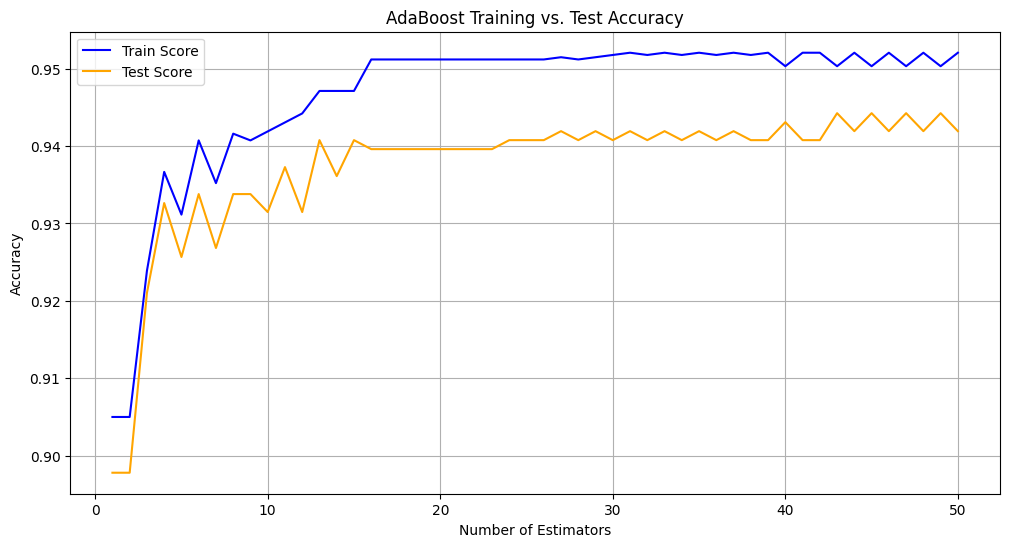

Gradient Boosting Accuracy: 0.9443
Gradient Boosting MSE: 0.0557


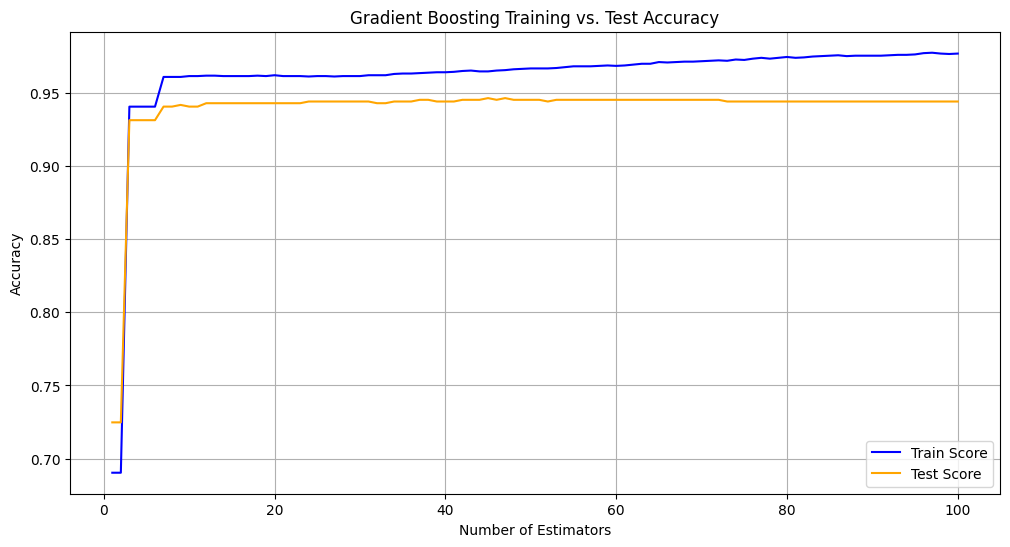

XGBoost Accuracy: 0.9396
XGBoost MSE: 0.0604


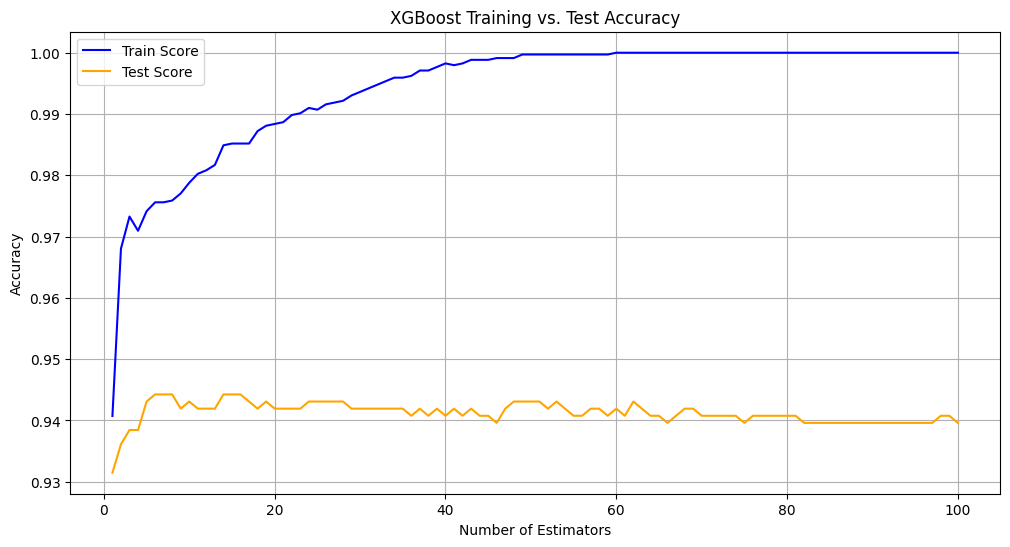

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Функція для навчання моделей і виводу метрик
def train_and_evaluate(model, model_name):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print(f"{model_name} MSE: {mse:.4f}")
    
    return model

# Графіки навчання
def plot_learning_curve(model, model_name, n_estimators):
    train_scores = []
    test_scores = []

    for n in range(1, n_estimators + 1):
        model.set_params(n_estimators=n)
        model.fit(X_train, y_train)
        
        train_scores.append(model.score(X_train, y_train))
        test_scores.append(model.score(X_test, y_test))

    plt.figure(figsize=(12, 6))
    plt.plot(range(1, n_estimators + 1), train_scores, label='Train Score', color='blue')
    plt.plot(range(1, n_estimators + 1), test_scores, label='Test Score', color='orange')
    plt.title(f'{model_name} Training vs. Test Accuracy')
    plt.xlabel('Number of Estimators')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()
    plt.show()

# 1. AdaBoost
ada_model = AdaBoostClassifier(n_estimators=50, algorithm='SAMME', random_state=42)
train_and_evaluate(ada_model, "AdaBoost")
plot_learning_curve(ada_model, "AdaBoost", n_estimators=50)

# 2. Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
train_and_evaluate(gb_model, "Gradient Boosting")
plot_learning_curve(gb_model, "Gradient Boosting", n_estimators=100)

# 3. XGBoost
xgb_model = XGBClassifier(n_estimators=100, random_state=42, eval_metric='logloss')
train_and_evaluate(xgb_model, "XGBoost")
plot_learning_curve(xgb_model, "XGBoost", n_estimators=100)

Best parameters for AdaBoost: {'learning_rate': 1.0, 'n_estimators': 150}
Best accuracy for AdaBoost: 0.9535149525770412
AdaBoost Test Accuracy: 0.9419
AdaBoost Test MSE: 0.0581


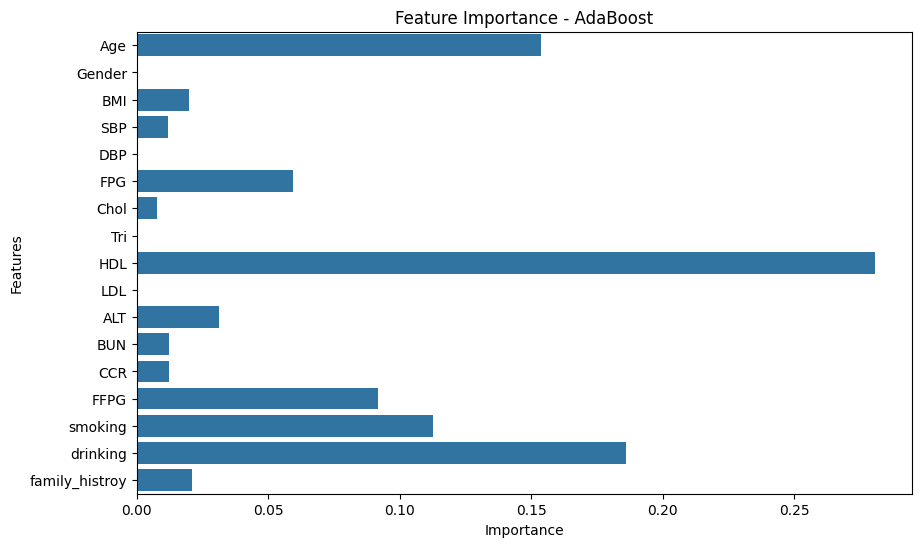

Best parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 150}
Best accuracy for Gradient Boosting: 0.9601950923144429
Gradient Boosting Test Accuracy: 0.9419
Gradient Boosting Test MSE: 0.0581


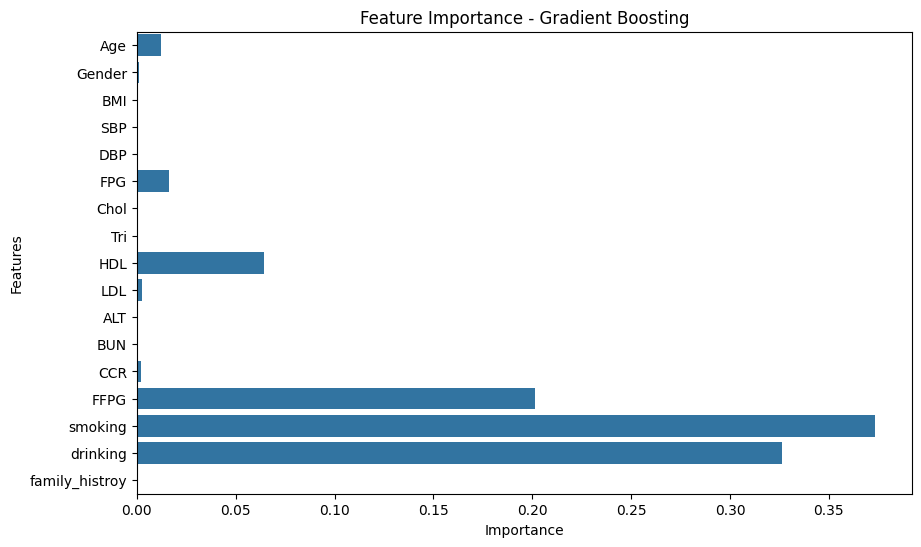

Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50, 'subsample': 1.0}
Best accuracy for XGBoost: 0.9604862119013063
XGBoost Test Accuracy: 0.9443
XGBoost Test MSE: 0.0557


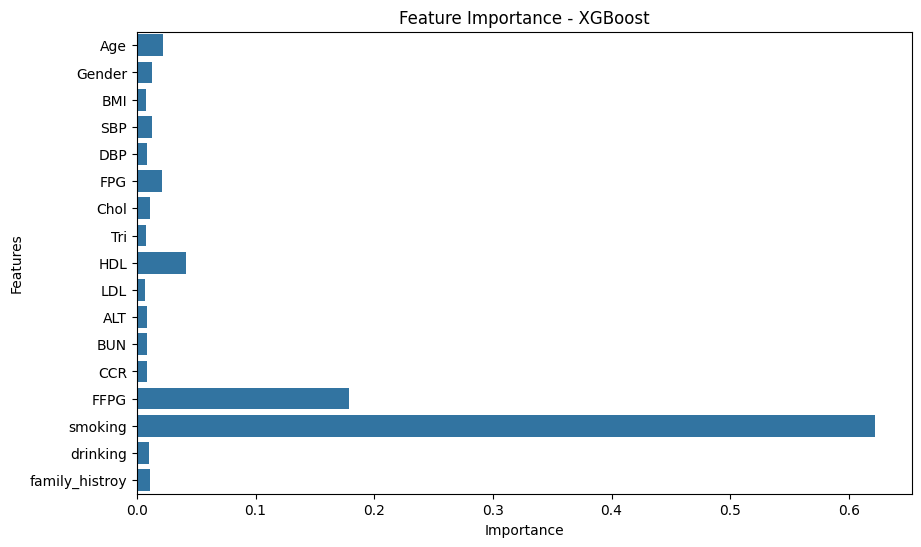

In [9]:
import seaborn as sns
from sklearn.model_selection import GridSearchCV

# Тонке налаштування для AdaBoost
ada_param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1.0]
}
ada_model = AdaBoostClassifier(random_state=42, algorithm='SAMME')
ada_grid = GridSearchCV(ada_model, ada_param_grid, cv=5, scoring='accuracy')
ada_grid.fit(X_train, y_train)

# Виводимо кращі параметри та результати
print("Best parameters for AdaBoost:", ada_grid.best_params_)
print("Best accuracy for AdaBoost:", ada_grid.best_score_)

# Оцінка кращої моделі AdaBoost
best_ada_model = ada_grid.best_estimator_
ada_predictions = best_ada_model.predict(X_test)
ada_accuracy = accuracy_score(y_test, ada_predictions)
ada_mse = mean_squared_error(y_test, ada_predictions)
print(f"AdaBoost Test Accuracy: {ada_accuracy:.4f}")
print(f"AdaBoost Test MSE: {ada_mse:.4f}")

# Важливість ознак для AdaBoost
ada_feature_importances = best_ada_model.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=ada_feature_importances, y=X.columns)
plt.title('Feature Importance - AdaBoost')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# Тонке налаштування для Gradient Boosting
gb_param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}
gb_model = GradientBoostingClassifier(random_state=42)
gb_grid = GridSearchCV(gb_model, gb_param_grid, cv=5, scoring='accuracy')
gb_grid.fit(X_train, y_train)

# Виводимо кращі параметри та результати
print("Best parameters for Gradient Boosting:", gb_grid.best_params_)
print("Best accuracy for Gradient Boosting:", gb_grid.best_score_)

# Оцінка кращої моделі Gradient Boosting
best_gb_model = gb_grid.best_estimator_
gb_predictions = best_gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_predictions)
gb_mse = mean_squared_error(y_test, gb_predictions)
print(f"Gradient Boosting Test Accuracy: {gb_accuracy:.4f}")
print(f"Gradient Boosting Test MSE: {gb_mse:.4f}")

# Важливість ознак для Gradient Boosting
gb_feature_importances = best_gb_model.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=gb_feature_importances, y=X.columns)
plt.title('Feature Importance - Gradient Boosting')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# Тонке налаштування для XGBoost
xgb_param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0]
}
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_grid = GridSearchCV(xgb_model, xgb_param_grid, cv=5, scoring='accuracy')
xgb_grid.fit(X_train, y_train)

# Виводимо кращі параметри та результати
print("Best parameters for XGBoost:", xgb_grid.best_params_)
print("Best accuracy for XGBoost:", xgb_grid.best_score_)

# Оцінка кращої моделі XGBoost
best_xgb_model = xgb_grid.best_estimator_
xgb_predictions = best_xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
print(f"XGBoost Test Accuracy: {xgb_accuracy:.4f}")
print(f"XGBoost Test MSE: {xgb_mse:.4f}")

# Важливість ознак для XGBoost
xgb_feature_importances = best_xgb_model.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=xgb_feature_importances, y=X.columns)
plt.title('Feature Importance - XGBoost')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


Best parameters for Gradient Boosting with regularization: {'ccp_alpha': 0.0, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 150}
Best accuracy for Gradient Boosting with regularization: 0.9601950923144429
Gradient Boosting Test Accuracy with regularization: 0.9419
Gradient Boosting Test MSE with regularization: 0.0581


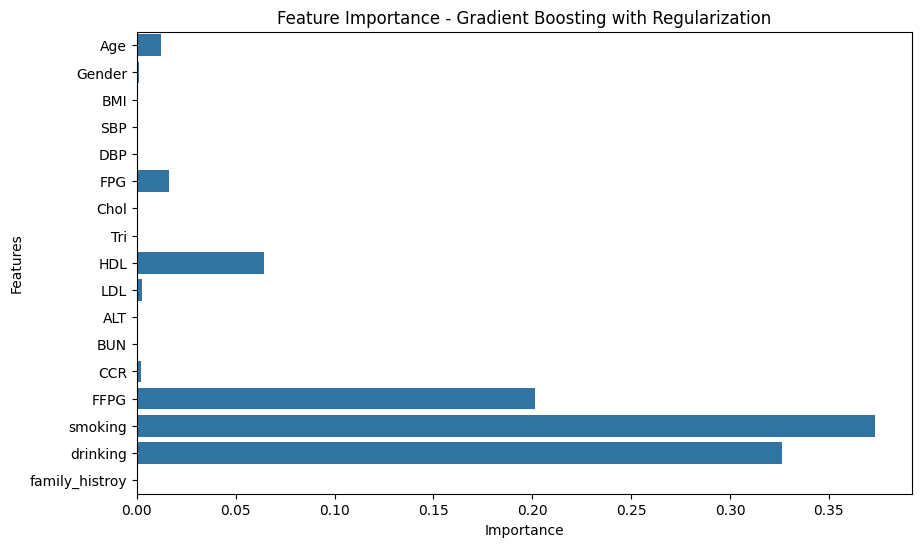

Best parameters for XGBoost with regularization: {'alpha': 0.1, 'lambda': 0.0, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 50, 'subsample': 0.8}
Best accuracy for XGBoost with regularization: 0.9607769095757248
XGBoost Test Accuracy with regularization: 0.9431
XGBoost Test MSE with regularization: 0.0569


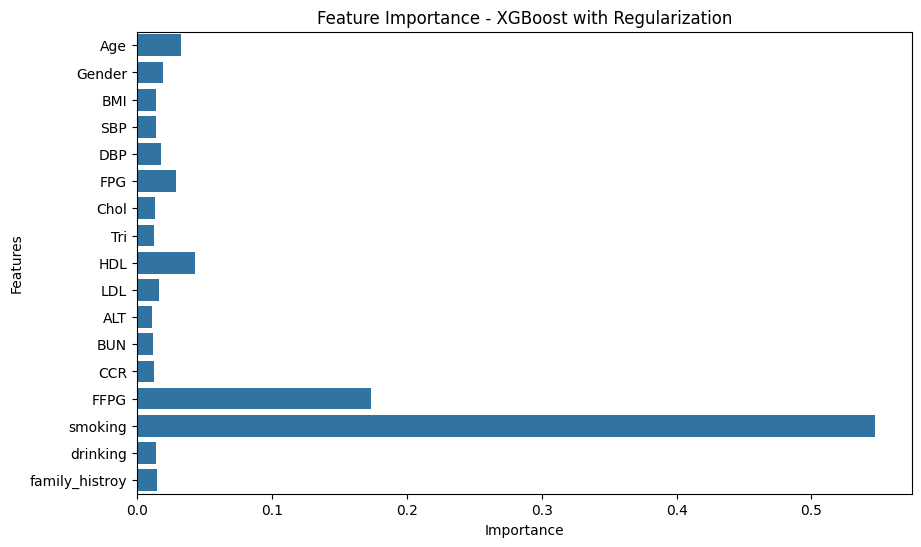

In [10]:
# Регуляризація для Gradient Boosting
gb_param_grid_reg = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'ccp_alpha': [0.0, 0.01, 0.1]  # L2 регуляризація
}
gb_model_reg = GradientBoostingClassifier(random_state=42)
gb_grid_reg = GridSearchCV(gb_model_reg, gb_param_grid_reg, cv=5, scoring='accuracy')
gb_grid_reg.fit(X_train, y_train)

# Виводимо кращі параметри та результати для Gradient Boosting з регуляризацією
print("Best parameters for Gradient Boosting with regularization:", gb_grid_reg.best_params_)
print("Best accuracy for Gradient Boosting with regularization:", gb_grid_reg.best_score_)

# Оцінка кращої моделі Gradient Boosting з регуляризацією
best_gb_model_reg = gb_grid_reg.best_estimator_
gb_predictions_reg = best_gb_model_reg.predict(X_test)
gb_accuracy_reg = accuracy_score(y_test, gb_predictions_reg)
gb_mse_reg = mean_squared_error(y_test, gb_predictions_reg)
print(f"Gradient Boosting Test Accuracy with regularization: {gb_accuracy_reg:.4f}")
print(f"Gradient Boosting Test MSE with regularization: {gb_mse_reg:.4f}")

# Важливість ознак для Gradient Boosting з регуляризацією
gb_feature_importances_reg = best_gb_model_reg.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=gb_feature_importances_reg, y=X.columns)
plt.title('Feature Importance - Gradient Boosting with Regularization')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# Регуляризація для XGBoost
# Налаштування параметрів з L1 та L2 регуляризацією
xgb_param_grid_reg = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0],
    'alpha': [0.0, 0.01, 0.1],  # L1 регуляризація
    'lambda': [0.0, 0.01, 0.1]  # L2 регуляризація
}
xgb_model_reg = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_grid_reg = GridSearchCV(xgb_model_reg, xgb_param_grid_reg, cv=5, scoring='accuracy')
xgb_grid_reg.fit(X_train, y_train)

# Виводимо кращі параметри та результати для XGBoost з регуляризацією
print("Best parameters for XGBoost with regularization:", xgb_grid_reg.best_params_)
print("Best accuracy for XGBoost with regularization:", xgb_grid_reg.best_score_)

# Оцінка кращої моделі XGBoost з регуляризацією
best_xgb_model_reg = xgb_grid_reg.best_estimator_
xgb_predictions_reg = best_xgb_model_reg.predict(X_test)
xgb_accuracy_reg = accuracy_score(y_test, xgb_predictions_reg)
xgb_mse_reg = mean_squared_error(y_test, xgb_predictions_reg)
print(f"XGBoost Test Accuracy with regularization: {xgb_accuracy_reg:.4f}")
print(f"XGBoost Test MSE with regularization: {xgb_mse_reg:.4f}")

# Важливість ознак для XGBoost з регуляризацією
xgb_feature_importances_reg = best_xgb_model_reg.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=xgb_feature_importances_reg, y=X.columns)
plt.title('Feature Importance - XGBoost with Regularization')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [11]:
from sklearn.metrics import classification_report, accuracy_score

# Генеруємо прогнози для кожної моделі
ada_predictions = ada_grid.predict(X_test)  # Використовуємо найкращу модель з GridSearchCV
gb_predictions = gb_grid.predict(X_test)  # Використовуємо найкращу модель з GridSearchCV
xgb_predictions = xgb_grid.predict(X_test)  # Використовуємо найкращу модель з GridSearchCV

# Для моделей з регуляризацією
gb_predictions_reg = gb_grid_reg.predict(X_test)  # Використовуємо модель з регуляризацією
xgb_predictions_reg = xgb_grid_reg.predict(X_test)  # Використовуємо модель з регуляризацією

# Звіт про класифікацію для детальних метрик
print("--- Звіт про класифікацію для AdaBoost ---")
print(classification_report(y_test, ada_predictions))

print("--- Звіт про класифікацію для Gradient Boosting ---")
print(classification_report(y_test, gb_predictions))

print("--- Звіт про класифікацію для XGBoost ---")
print(classification_report(y_test, xgb_predictions))

print("--- Звіт про класифікацію для Gradient Boosting з регуляризацією ---")
print(classification_report(y_test, gb_predictions_reg))

print("--- Звіт про класифікацію для XGBoost з регуляризацією ---")
print(classification_report(y_test, xgb_predictions_reg))

# Підсумок точності для всіх моделей
print("\n--- Підсумок точності ---")
ada_accuracy = accuracy_score(y_test, ada_predictions)  # Обчислюємо точність для AdaBoost
gb_accuracy = accuracy_score(y_test, gb_predictions)  # Обчислюємо точність для Gradient Boosting
xgb_accuracy = accuracy_score(y_test, xgb_predictions)  # Обчислюємо точність для XGBoost

gb_accuracy_reg = accuracy_score(y_test, gb_predictions_reg)  # Точність для Gradient Boosting з регуляризацією
xgb_accuracy_reg = accuracy_score(y_test, xgb_predictions_reg)  # Точність для XGBoost з регуляризацією

print("Модель                      | Точність (без регуляризації) | Точність (з регуляризацією)")
print("------------------------------------------------------------------------------------")
print(f"AdaBoost                  | {ada_accuracy:.4f}                          | N/A")
print(f"Gradient Boosting         | {gb_accuracy:.4f}                          | {gb_accuracy_reg:.4f}")
print(f"XGBoost                   | {xgb_accuracy:.4f}                          | {xgb_accuracy_reg:.4f}")

--- Звіт про класифікацію для AdaBoost ---
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       624
           1       0.95      0.84      0.89       237

    accuracy                           0.94       861
   macro avg       0.94      0.91      0.92       861
weighted avg       0.94      0.94      0.94       861

--- Звіт про класифікацію для Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       624
           1       0.94      0.84      0.89       237

    accuracy                           0.94       861
   macro avg       0.94      0.91      0.92       861
weighted avg       0.94      0.94      0.94       861

--- Звіт про класифікацію для XGBoost ---
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       624
           1       0.94      0.85      0.89       237

    accuracy                           0.94  

### **Загальний аналіз**
У цьому випадку XGBoost з регуляризацією дав найкращі результати, але всі моделі показують конкурентоспроможні результати.
Регуляризація може покращити результати моделей, особливо в сценаріях з високою варіативністю, але в деяких випадках, таких як Gradient Boosting, вона може не мати значного впливу.